<a href="https://colab.research.google.com/github/ArmandoSep/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [64]:
# TODO - code!
# 1.
# What is the probability that a person is drunk after one positive breathalyzer test?
# What is the probability that a person is drunk after two positive breathalyzer tests?
# How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?


def prob_drunk_given_positive(p_user, p_pos_nonuser, p_pos_user):
  numerator = (p_pos_user*p_user)
  denominator = (p_pos_user*p_user)+(p_pos_nonuser*(1-p_user))
  posterior1= numerator/denominator
  return posterior1

# p_user = 1/1000
# p_pos_nonuser = 8/100
# p_pos_user = 1
posterior1 = prob_drunk_given_positive(0.001, 0.08,1)
posterior1

0.012357884330202669

### Probability of test 2

In [65]:
posterior2 = prob_drunk_given_positive(posterior1, 0.08,1)
posterior2

0.13525210993291495

### Probability of test 3

In [66]:
posterior3 = prob_drunk_given_positive(posterior2, 0.08,1)
posterior3

0.6615996951348605

### Probability of test 4 -> needs to be >95%

In [67]:
posterior4 = prob_drunk_given_positive(posterior3, 0.08,1)
posterior4

0.9606895076105054

### 2. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general.

In [0]:
from scipy import stats

In [0]:
?stats.bayes_mvs

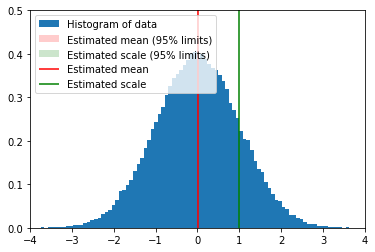

In [70]:
# Example from documentation
n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
            alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
            label=r'Estimated scale (95% limits)')

ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

In [71]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-04-15 20:40:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-04-15 20:40:34 (610 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [72]:
import pandas as pd
df =pd.read_csv('house-votes-84.data', names=['party','h-infants','water-proj',
                          'budget','phys-freeze', 'salvador-aid',
                          'rel-in-schools','anti-sat-test',
                          'nic-contras','mx-missile','immigration',
                          'synfuels-cut', 'edu-spend', 'sue-perfund','crime','d-free',
                          'export-sa'])
print(df.shape)
df.head()

(435, 17)


,party,h-infants,water-proj,budget,phys-freeze,salvador-aid,rel-in-schools,anti-sat-test,nic-contras,mx-missile,immigration,synfuels-cut,edu-spend,sue-perfund,crime,d-free,export-sa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
import numpy as np
df = df.replace({'y':1, 'n':0, '?':np.NaN})

In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

In [75]:
dem = dem.dropna(0)
dem.head()

,party,h-infants,water-proj,budget,phys-freeze,salvador-aid,rel-in-schools,anti-sat-test,nic-contras,mx-missile,immigration,synfuels-cut,edu-spend,sue-perfund,crime,d-free,export-sa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [76]:
dem.isnull().sum()

party             0
h-infants         0
water-proj        0
budget            0
phys-freeze       0
salvador-aid      0
rel-in-schools    0
anti-sat-test     0
nic-contras       0
mx-missile        0
immigration       0
synfuels-cut      0
edu-spend         0
sue-perfund       0
crime             0
d-free            0
export-sa         0
dtype: int64

In [77]:
dem.shape

(124, 17)

In [78]:
dem['budget']

5      1.0
19     1.0
23     1.0
25     1.0
26     1.0
      ... 
421    1.0
422    1.0
423    1.0
426    1.0
431    1.0
Name: budget, Length: 124, dtype: float64

In [79]:
dem['budget'].mean()

0.8548387096774194

In [0]:
def confidence_interval(data, confidence=.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (lower bound, mean, upper bound)
  """
  # turn data into array
  data = np.array(data)
  # finds mean 
  mean = np.mean(data)
  n = len(data)
  std_err = stats.sem(data)
  dof = n - 1
  interval = std_err * stats.t.ppf((1 + confidence)/ 2.0, dof)
  return (mean - interval, mean, mean + interval)

In [81]:
bayes_mean, _, _ = stats.bayes_mvs(dem['budget'], alpha=.95)
bayes_mean

Mean(statistic=0.8548387096774194, minmax=(0.791966749899413, 0.9177106694554258))

In [0]:
CI = confidence_interval(dem['budget'])

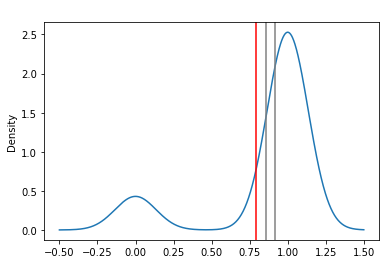

In [84]:
# Graph using frequentist
dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(CI[0], color='red')
plt.axvline(CI[1], color='grey')
plt.axvline(CI[2], color='grey')

plt.show;

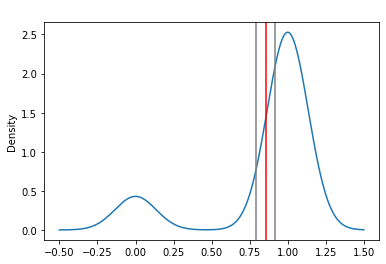

In [88]:
# Graph using bayes
dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(bayes_mean[0], color='red')
plt.axvline(bayes_mean[1][0], color='grey')
plt.axvline(bayes_mean[1][1], color='grey')

plt.show;

In [86]:
print('Frequentist: \n', "lower:", CI[0],'upper:', CI[1], CI[2])
print('Bayesian: \n', "lower:", bayes_mean[0],'upper:', bayes_mean[1][0], bayes_mean[1][1])

Frequentist: 
 lower: 0.791966749899413 upper: 0.8548387096774194 0.9177106694554258
Bayesian: 
 lower: 0.8548387096774194 upper: 0.791966749899413 0.9177106694554258


### 3. 

*   Bayesian considers a prior probability, which will vary as new information comes.
*   Frequentists statistics does not consider prior information.
*   If the dataset is large enough, the two of them should show have a similar t-statistic and p-value. We need to consider that the alpha on Bayesian is 90%. Therefore we need to change it to match the frequentistis test.


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!